# 分类器+词向量
- 时间复杂度：低
- 空间复杂度：低

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
from a_Data_preprocessing import load_xy
from b_metrics import metric, Timer
%matplotlib inline
import numpy as np

## 数据加载、预处理

In [2]:
X_train, X_test, y_train, y_test = load_xy(2)
X_train = [np.mean(x, axis=0) for x in X_train]
X_test = [np.mean(x, axis=0) for x in X_test]

### 逻辑回归

                precision    recall  f1-score   support

          car_       0.97      0.96      0.97       409
    education_       0.83      0.85      0.84       410
entertainment_       0.73      0.84      0.78       375
      fashion_       0.80      0.76      0.78       394
      finance_       0.83      0.80      0.81       402
     military_       0.73      0.81      0.76       343
     politics_       0.69      0.59      0.64       400
      science_       0.78      0.74      0.76       372
       sports_       0.97      0.97      0.97       393

     micro avg       0.81      0.81      0.81      3498
     macro avg       0.81      0.81      0.81      3498
  weighted avg       0.82      0.81      0.81      3498



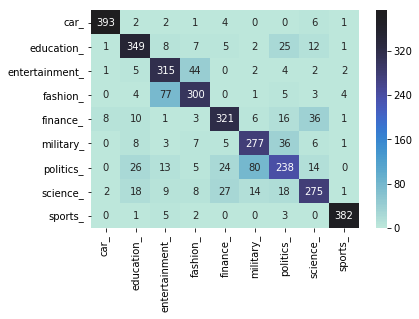

0.22分钟


In [3]:
from sklearn.linear_model import LogisticRegression
t = Timer()  # 计时器
clf = LogisticRegression().fit(X_train, y_train)  # 建模训练
y_pred = clf.predict(X_test)  # 预测
metric(y_test, y_pred)  # 评估
del t

### Support Vector Machine

                precision    recall  f1-score   support

          car_       0.97      0.96      0.97       409
    education_       0.83      0.85      0.84       410
entertainment_       0.73      0.84      0.78       375
      fashion_       0.80      0.76      0.78       394
      finance_       0.83      0.80      0.81       402
     military_       0.73      0.81      0.76       343
     politics_       0.69      0.59      0.64       400
      science_       0.78      0.74      0.76       372
       sports_       0.97      0.97      0.97       393

     micro avg       0.81      0.81      0.81      3498
     macro avg       0.81      0.81      0.81      3498
  weighted avg       0.82      0.81      0.81      3498



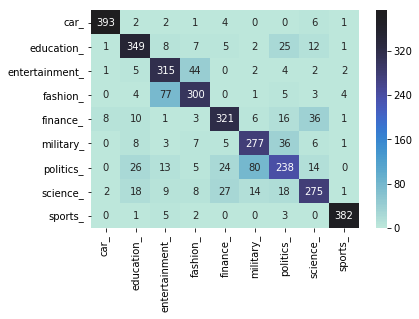

0.21分钟


In [4]:
from sklearn.linear_model import LogisticRegression
t = Timer()  # 计时器
clf = LogisticRegression().fit(X_train, y_train)  # 建模训练
y_pred = clf.predict(X_test)  # 预测
metric(y_test, y_pred)  # 评估
del t

### 决策树

                precision    recall  f1-score   support

          car_       0.89      0.86      0.88       409
    education_       0.77      0.75      0.76       410
entertainment_       0.66      0.69      0.68       375
      fashion_       0.69      0.68      0.69       394
      finance_       0.71      0.71      0.71       402
     military_       0.63      0.70      0.66       343
     politics_       0.61      0.55      0.58       400
      science_       0.63      0.65      0.64       372
       sports_       0.91      0.93      0.92       393

     micro avg       0.73      0.73      0.73      3498
     macro avg       0.72      0.72      0.72      3498
  weighted avg       0.73      0.73      0.73      3498



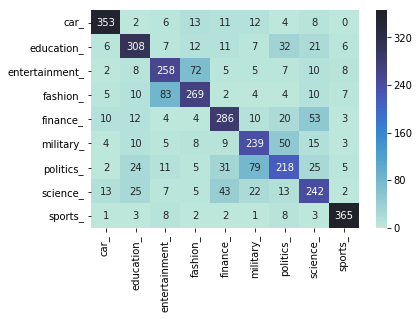

0.07分钟


In [5]:
from sklearn.tree import DecisionTreeClassifier
t = Timer()  # 计时器
clf = DecisionTreeClassifier().fit(X_train, y_train)  # 建模训练
y_pred = clf.predict(X_test)  # 预测
metric(y_test, y_pred)  # 评估
del t

### 随机森林

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
t = Timer()  # 计时器
model = RandomForestClassifier()  # 随机森林分类器
param = {'min_samples_split': [2, 3], 'max_depth': [3, 4, None]}  # 组合参数
clf = GridSearchCV(model, param).fit(X_train, y_train)  # 交叉验证
clf.best_params_

{'max_depth': None, 'min_samples_split': 3}

                precision    recall  f1-score   support

          car_       0.95      0.93      0.94       409
    education_       0.80      0.82      0.81       410
entertainment_       0.72      0.83      0.77       375
      fashion_       0.77      0.74      0.75       394
      finance_       0.79      0.79      0.79       402
     military_       0.73      0.80      0.76       343
     politics_       0.69      0.65      0.67       400
      science_       0.76      0.68      0.72       372
       sports_       0.97      0.95      0.96       393

     micro avg       0.80      0.80      0.80      3498
     macro avg       0.80      0.80      0.80      3498
  weighted avg       0.80      0.80      0.80      3498



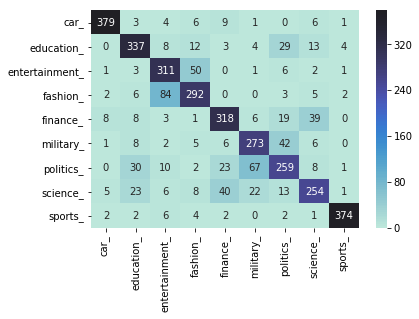

0.23分钟


In [7]:
y_pred = clf.predict(X_test)
metric(y_test, y_pred)
del t

### 贝叶斯

In [8]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))  # 贝叶斯不能有负数（ValueError: Input X must be non-negative）
X_train = [sigmoid(x) for x in X_train]
X_test = [sigmoid(x) for x in X_test]

                precision    recall  f1-score   support

          car_       0.95      0.82      0.88       409
    education_       0.83      0.80      0.81       410
entertainment_       0.61      0.89      0.72       375
      fashion_       0.80      0.66      0.73       394
      finance_       0.75      0.75      0.75       402
     military_       0.72      0.76      0.74       343
     politics_       0.64      0.62      0.63       400
      science_       0.66      0.61      0.64       372
       sports_       0.98      0.92      0.95       393

     micro avg       0.76      0.76      0.76      3498
     macro avg       0.77      0.76      0.76      3498
  weighted avg       0.77      0.76      0.76      3498



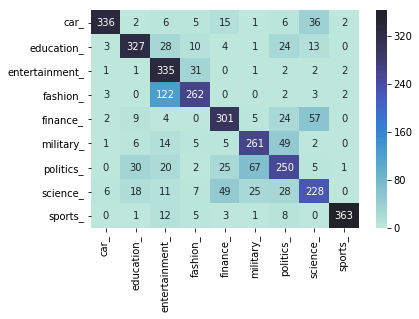

0.01分钟


In [9]:
from sklearn.naive_bayes import MultinomialNB
t = Timer()  # 计时器
clf = MultinomialNB().fit(X_train, y_train)  # 建模训练
y_pred = clf.predict(X_test)  # 预测
metric(y_test, y_pred)  # 评估
del t